# Keras intro exercises

## 1. Build a simple sequential model

* Can you build a sequential model to reproduce the graph shown in the figure? 
* Assume that this is a classifier
* Choose whatever activations you want, wherever possible
* How many classes are we predicting?

<center><img src="figures/sequence_api_exercise.png"></center>

In [4]:
#!wget https://raw.githubusercontent.com/NBISweden/workshop-neural-nets-and-deep-learning/master/session_annBuildingBlocks/lab_keras/exercises.ipynb
!mkdir figures
!wget -P figures/ https://raw.githubusercontent.com/NBISweden/workshop-neural-nets-and-deep-learning/master/session_annBuildingBlocks/lab_keras/figures/sequence_api_exercise.png

--2024-05-20 13:47:50--  https://raw.githubusercontent.com/NBISweden/workshop-neural-nets-and-deep-learning/master/session_annBuildingBlocks/lab_keras/figures/sequence_api_exercise.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27270 (27K) [image/png]
Saving to: ‘figures/sequence_api_exercise.png’

sequence_api_exerci 100%[===================>]  26.63K  --.-KB/s    in 0s      

2024-05-20 13:47:50 (102 MB/s) - ‘figures/sequence_api_exercise.png’ saved [27270/27270]



In [2]:
import warnings
warnings.filterwarnings('ignore')

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# feature number is 256
model.add(Dense(units=64, activation='relu', input_dim=256, name="Dense")) # input: batch (==1 in this case) [n * 256] × [ 256 * 64 ] # + 64 bias
model.add(Dense(units=32, activation='relu', name="dense_1")) # input:  [ n * 64 ] × [ 64 * 32 ] # + 32 bias
model.add(Dense(units=10, activation='softmax', name="dense_2")) # input: [ 64 * 32 ] × [32 * 10 ] # + 10 bias
model.summary()

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense (Dense)                (None, 64)                16448     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 18,858
Trainable params: 18,858
Non-trainable params: 0
_________________________________________________________________


In [67]:
model_regression = Sequential()
model_regression.add(Dense(10, activation="relu", input_dim=13))
model_regression.add(Dense(4, activation="relu"))
# model_regression.add(Dense(1, activation="linear"))
model_regression.add(Dense(1, activation=None)) # equals to activation=linear
model_regression.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_69 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 5         
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________


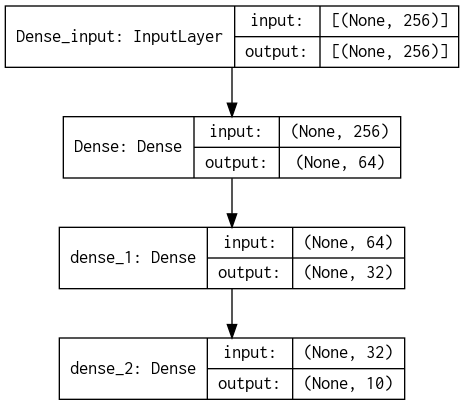

In [17]:
from tensorflow.keras.utils import plot_model

#Add your model here

plot_model(model, "figures/exercise_model.png", show_shapes=True)

## 2. Build a better XOR classifier

Given the model seen at lecture, how do we make a better classifier (higher accuracy)?

* More layers? More neurons?
* Generate more data?
* More epochs?
* Different batch size?
* Different optimizer?
* It's up to you! Let's see who does best on validation

Only for Tuesday's session:

* Different activations?
* Add Dropout? How large?

Training curve plotting function:

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

def plot_loss_acc(history):
    try:
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
    except:
        plt.plot(history.history['acc'])
        plt.plot(history.history['val_acc'])
        
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train acc', 'val acc', 'train loss', 'val loss'], loc='upper left')
    plt.show()

Data generation step:

In [50]:
# Generate XOR data
data = np.random.random((10000, 3)) - 0.5
labels = np.zeros((10000, 1))

# xor 一真一假 异或判断
labels[np.where(np.logical_xor(np.logical_xor(data[:,0] > 0, data[:,1] > 0), data[:,2] > 0))] = 1

#let's print some data and the corresponding label to check that they match the table above
for x in range(3):
    print("{0: .2f} xor {1: .2f} xor {2: .2f} equals {3:}".format(data[x,0], data[x,1], data[x,2], labels[x,0]))

 0.05 xor -0.13 xor -0.21 equals 1.0
 0.02 xor -0.17 xor -0.06 equals 1.0
-0.00 xor -0.45 xor -0.13 equals 0.0


In [51]:
n_slice = 2
print(data[n_slice,...])
print(labels[n_slice,...])

[-0.0007251  -0.450149   -0.13160323]
[0.]



The baseline network to improve:

In [54]:
model = Sequential()
model.add(Dense(units=10, activation='tanh', input_dim=3))
model.add(Dense(units=4, activation='tanh'))
model.add(Dense(units=2, activation='softmax'))

model.compile(optimizer='adam', # Defaults to 0.001
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'] # matrix 就是之后打印用的，不会影响模型训练
              )

# Train the model, iterating on the data in batches of 128 samples
history = model.fit(data, labels, epochs=30, batch_size=128, validation_split=0.1)

Epoch 1/30
71/71 [==============================] - 2s 24ms/step - loss: 0.7036 - accuracy: 0.4159 - val_loss: 0.6931 - val_accuracy: 0.4680
Epoch 2/30
71/71 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4936 - val_loss: 0.6921 - val_accuracy: 0.5060
Epoch 3/30
71/71 [==============================] - 0s 4ms/step - loss: 0.6908 - accuracy: 0.5164 - val_loss: 0.6915 - val_accuracy: 0.4770
Epoch 4/30
71/71 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.4981 - val_loss: 0.6908 - val_accuracy: 0.4590
Epoch 5/30
71/71 [==============================] - 1s 8ms/step - loss: 0.6895 - accuracy: 0.4978 - val_loss: 0.6894 - val_accuracy: 0.5370
Epoch 6/30
71/71 [==============================] - 0s 6ms/step - loss: 0.6876 - accuracy: 0.5495 - val_loss: 0.6885 - val_accuracy: 0.4920
Epoch 7/30
71/71 [==============================] - 1s 13ms/step - loss: 0.6866 - accuracy: 0.5233 - val_loss: 0.6862 - val_accuracy: 0.4960
Epoch 8/30
71/71 [

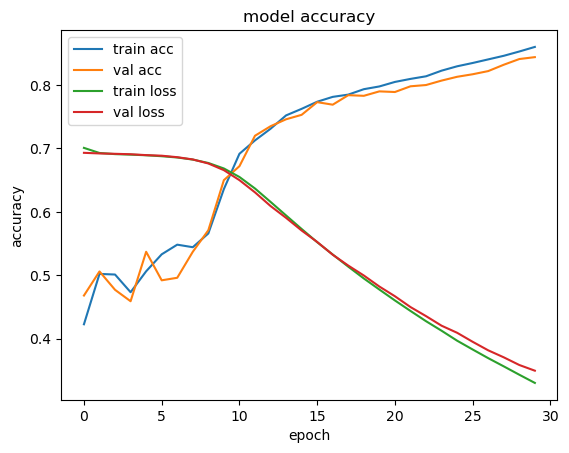

In [55]:
plot_loss_acc(history)

Epoch 1/30
47/47 [==============================] - 1s 12ms/step - loss: 0.7051 - accuracy: 0.4896 - val_loss: 0.6971 - val_accuracy: 0.4819
Epoch 2/30
47/47 [==============================] - 0s 6ms/step - loss: 0.6933 - accuracy: 0.4890 - val_loss: 0.6935 - val_accuracy: 0.5016
Epoch 3/30
47/47 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.4995 - val_loss: 0.6920 - val_accuracy: 0.5231
Epoch 4/30
47/47 [==============================] - 1s 18ms/step - loss: 0.6916 - accuracy: 0.5237 - val_loss: 0.6912 - val_accuracy: 0.5210
Epoch 5/30
47/47 [==============================] - 0s 8ms/step - loss: 0.6891 - accuracy: 0.5387 - val_loss: 0.6907 - val_accuracy: 0.5199
Epoch 6/30
47/47 [==============================] - 1s 30ms/step - loss: 0.6905 - accuracy: 0.5090 - val_loss: 0.6901 - val_accuracy: 0.5304
Epoch 7/30
47/47 [==============================] - 0s 7ms/step - loss: 0.6890 - accuracy: 0.5331 - val_loss: 0.6897 - val_accuracy: 0.5360
Epoch 8/30
47/47 

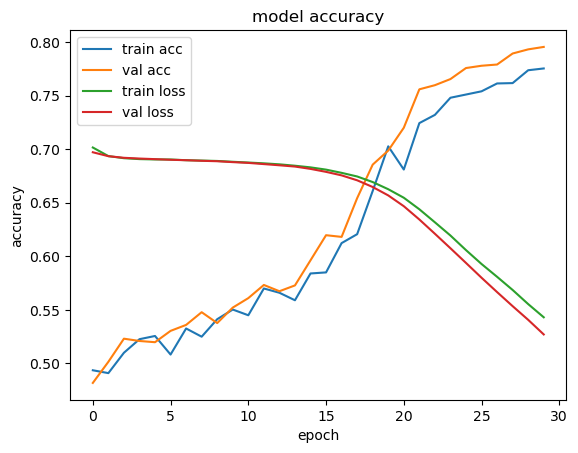

In [56]:
# smaller batch size --
model_test = Sequential()
model_test.add(Dense(units=10, activation='tanh', input_dim=3))
model_test.add(Dense(units=4, activation='tanh'))
model_test.add(Dense(units=2, activation='softmax'))

model_test.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'] # matrix 就是之后打印用的，不会影响模型训练
              )

# Train the model, iterating on the data in batches of 64 samples
history2 = model_test.fit(data, labels, epochs=30, batch_size=64, validation_split=0.7)
plot_loss_acc(history2)


Epoch 1/30
47/47 [==============================] - 1s 12ms/step - loss: 0.7247 - accuracy: 0.5984 - val_loss: 0.6994 - val_accuracy: 0.6076
Epoch 2/30
47/47 [==============================] - 0s 8ms/step - loss: 0.6975 - accuracy: 0.5795 - val_loss: 0.6902 - val_accuracy: 0.5721
Epoch 3/30
47/47 [==============================] - 0s 9ms/step - loss: 0.6898 - accuracy: 0.5577 - val_loss: 0.6870 - val_accuracy: 0.5190
Epoch 4/30
47/47 [==============================] - 1s 11ms/step - loss: 0.6852 - accuracy: 0.5228 - val_loss: 0.6852 - val_accuracy: 0.5286
Epoch 5/30
47/47 [==============================] - 0s 9ms/step - loss: 0.6834 - accuracy: 0.5297 - val_loss: 0.6827 - val_accuracy: 0.5430
Epoch 6/30
47/47 [==============================] - 0s 8ms/step - loss: 0.6840 - accuracy: 0.5498 - val_loss: 0.6789 - val_accuracy: 0.5501
Epoch 7/30
47/47 [==============================] - 0s 10ms/step - loss: 0.6784 - accuracy: 0.5600 - val_loss: 0.6745 - val_accuracy: 0.5826
Epoch 8/30
47/47 

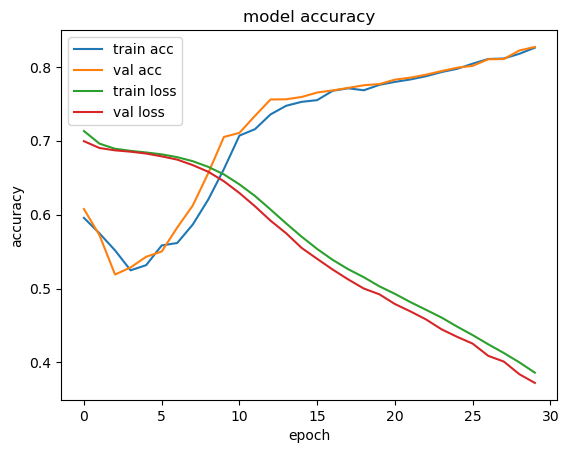

In [63]:
# add hidden layer ++

model_test = Sequential()
model_test.add(Dense(units=10, activation='tanh', input_dim=3))
model_test.add(Dense(units=4, activation='tanh'))
model_test.add(Dense(units=3, activation='tanh'))
model_test.add(Dense(units=2, activation='softmax'))

model_test.compile(optimizer='adam',  
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'] 
              )

# Train the model, iterating on the data in batches of 64 samples
history2 = model_test.fit(data, labels, epochs=30, batch_size=64, validation_split=0.7)
plot_loss_acc(history2)


Epoch 1/30
47/47 [==============================] - 1s 16ms/step - loss: 0.6894 - accuracy: 0.5386 - val_loss: 0.6384 - val_accuracy: 0.6459
Epoch 2/30
47/47 [==============================] - 1s 14ms/step - loss: 0.6022 - accuracy: 0.6853 - val_loss: 0.6018 - val_accuracy: 0.6977
Epoch 3/30
47/47 [==============================] - 0s 6ms/step - loss: 0.5637 - accuracy: 0.7254 - val_loss: 0.4523 - val_accuracy: 0.7950
Epoch 4/30
47/47 [==============================] - 0s 7ms/step - loss: 0.3687 - accuracy: 0.8377 - val_loss: 0.2129 - val_accuracy: 0.9020
Epoch 5/30
47/47 [==============================] - 0s 5ms/step - loss: 0.2449 - accuracy: 0.8897 - val_loss: 0.2002 - val_accuracy: 0.8997
Epoch 6/30
47/47 [==============================] - 0s 6ms/step - loss: 0.2074 - accuracy: 0.9040 - val_loss: 0.1578 - val_accuracy: 0.9303
Epoch 7/30
47/47 [==============================] - 0s 6ms/step - loss: 0.1558 - accuracy: 0.9316 - val_loss: 0.2092 - val_accuracy: 0.9144
Epoch 8/30
47/47 [

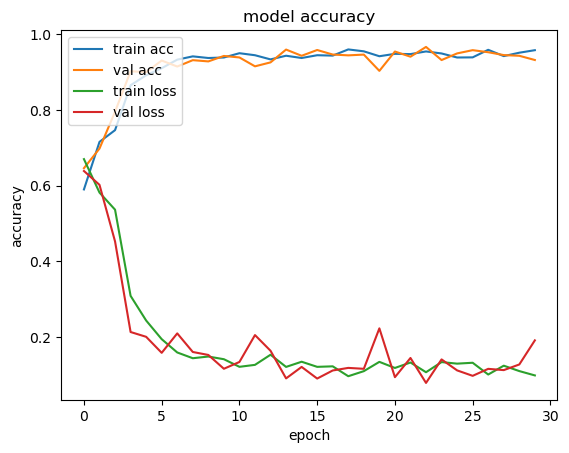

In [66]:
# increase learning rate ++
from tensorflow import keras

model_test = Sequential()
model_test.add(Dense(units=10, activation='tanh', input_dim=3))
model_test.add(Dense(units=4, activation='tanh'))
model_test.add(Dense(units=2, activation='softmax'))

model_test.compile(optimizer=keras.optimizers.Adam(0.1),  # high learning rate
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'] 
              )

# Train the model, iterating on the data in batches of 64 samples
history2 = model_test.fit(data, labels, epochs=30, batch_size=64, validation_split=0.7)
plot_loss_acc(history2)


## 3. Build a regression model

* Take the Boston housing dataset (http://lib.stat.cmu.edu/datasets/boston)
* Records a set of variables for a set of houses in Boston, including among others:
    * CRIM     per capita crime rate by town
    * ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
    * INDUS    proportion of non-retail business acres per town
    * CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    * NOX      nitric oxides concentration (parts per 10 million)
    * RM       average number of rooms per dwelling
* Can we use these variables to predict the value of a house (in tens of thousands of dollars)?

In [75]:
import tensorflow
from sklearn.preprocessing import StandardScaler 

#This is how we load the dataset, pre-split in training/validation sets
(X_train, y_train), (X_val, y_val) = tensorflow.keras.datasets.boston_housing.load_data(path="boston_housing.npz", test_split=0.2, seed=113)

#Let's have a look at the data
print(X_train.shape)
print(X_train[0], y_train[0])

# 标准化特征: 去除均值并缩放至单位方差
# u -- mean, s -- standard deviation
# z = (x - u) / s
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
print(X_train.shape)
print(X_train[0], y_train[0])


(404, 13)
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ] 15.2
(404, 13)
[-0.27224633 -0.48361547 -0.43576161 -0.25683275 -0.1652266  -0.1764426
  0.81306188  0.1166983  -0.62624905 -0.59517003  1.14850044  0.44807713
  0.8252202 ] 15.2


In [81]:
np.sum(y_train > 0),np.sum(y_val > 0)

(404, 102)

In [76]:
# regression
model = Sequential()
model.add(Dense(10, activation="relu", input_dim=13))
model.add(Dense(4, activation="relu"))
model.add(Dense(1, activation="linear"))

model.compile(optimizer='adam',                    # adaptive learning rate method
              loss='mean_absolute_error', metrics=["mean_absolute_error"]) 
model.summary()

history = model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_val, y_val))

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_71 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_72 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_73 (Dense)             (None, 1)                 5         
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
26/26 [==============================] - 1s 29ms/step - loss: 22.1754 - mean_absolute_error: 22.1754 - val_loss: 22.7869 - val_mean_absolute_error: 22.7869
Epoch 2/20
26/26 [==============================] - 1s 30ms/step - loss: 22.7765 - mean_absolute_error: 22.7765 - val_loss: 22.5737 - val_mean_absolute_error: 22.5737
Epoch 3/20
26/26 [==============================] -

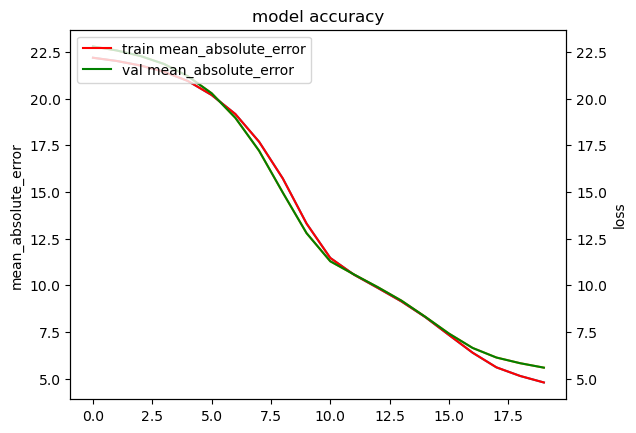

In [77]:
%matplotlib inline

import matplotlib.pyplot as plt

def plot_loss_mae(history, metric):
    
    fig,ax = plt.subplots()
    ax.plot(history.history[metric])
    ax.plot(history.history['val_' + metric])
    ax.set_ylabel(metric)
    ax2=ax.twinx()
    ax2.plot(history.history['loss'], c="red")
    ax2.plot(history.history['val_loss'], c="green")
    ax2.set_ylabel("loss")
    plt.title('model accuracy')
    #plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train ' + metric, 'val ' + metric, 'train loss', 'val loss'], loc='upper left')
    plt.show()
    
plot_loss_mae(history, "mean_absolute_error")

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 10)                140       
_________________________________________________________________
dense_90 (Dense)             (None, 4)                 44        
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 5         
Total params: 189
Trainable params: 189
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
51/51 [==============================] - 1s 14ms/step - loss: 21.5935 - mean_absolute_error: 21.5935 - val_loss: 22.4513 - val_mean_absolute_error: 22.4513
Epoch 2/20
51/51 [==============================] - 0s 6ms/step - loss: 22.0502 - mean_absolute_error: 22.0502 - val_loss: 21.6792 - val_mean_absolute_error: 21.6792
Epoch 3/20
51/51 [==============================] - 

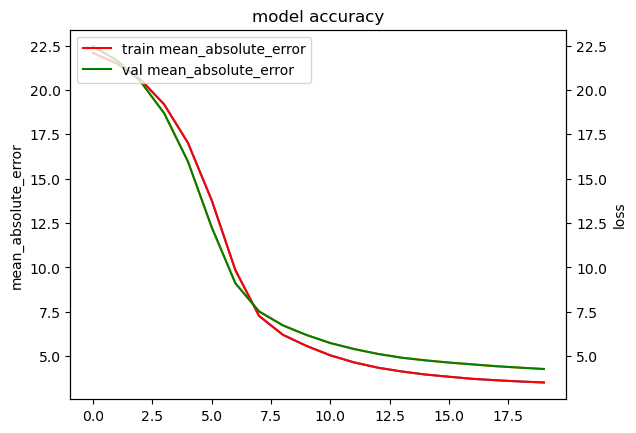

In [87]:
# adjust batch size
# batch size should match with learning rate
model_r = Sequential()
model_r.add(Dense(10, activation="relu", input_dim=13))
model_r.add(Dense(4, activation="relu"))
model_r.add(Dense(1, activation=None))

model_r.compile(optimizer='adam',                    # adaptive learning rate method
              loss='mean_absolute_error', metrics=["mean_absolute_error"]) 
model_r.summary()

history3 = model_r.fit(X_train, y_train, batch_size=8, epochs=20, validation_data=(X_val, y_val))
plot_loss_mae(history3, "mean_absolute_error")

## 4. The IMDB movie review sentiment dataset

Another pre-package toy dataset from Keras. Contains 25k reviews for a movies in IMDB, you want to predict whether the review is positive or negative.

> each review is encoded as a list of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 10,000 most common words, but eliminate the top 20 most common words".

https://keras.io/api/datasets/imdb/

Load the dataset, set a couple of important parameters (max_features, maxlen). Also pad all reviews with less than 200 words so that they have all the same length.

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

(x_train, y_train), (x_val, y_val) = keras.datasets.imdb.load_data(
    num_words=max_features
)
print(len(x_train), "Training sequences")
print(len(x_val), "Validation sequences")
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen, padding="post")
x_val = keras.preprocessing.sequence.pad_sequences(x_val, maxlen=maxlen, padding="post")


25000 Training sequences
25000 Validation sequences


Since the dataset is pre-processed so that each word is represented by an integer, we have to build a reverse dictionary if we want to actually read some of the reviews:

In [ ]:
# Use the default parameters to keras.datasets.imdb.load_data
start_char = 1
oov_char = 2
index_from = 3
# Retrieve the word index file mapping words to indices
word_index = keras.datasets.imdb.get_word_index()
# Reverse the word index to obtain a dict mapping indices to words
# And add `index_from` to indices to sync with `x_train`
inverted_word_index = dict(
    (i + index_from, word) for (word, i) in word_index.items()
)

inverted_word_index[0] = ""
# Update `inverted_word_index` to include `start_char` and `oov_char`
inverted_word_index[start_char] = "[START]"
inverted_word_index[oov_char] = "[OOV]"
# Decode the first sequence in the dataset


In [ ]:
print([i for i in x_train[2]])

In [ ]:
decoded_sequence = " ".join(inverted_word_index[i] for i in x_train[2])
print(decoded_sequence)

How do we build a predictor for this task?

In [ ]:
model = Sequential()
...